In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

In [4]:
import datajoint_utils as du
minnie,schema = du.configure_minnie_vm()

INFO - 2021-02-09 16:16:02,601 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-02-09 16:16:02,603 - settings - Setting database.user to celiib
INFO - 2021-02-09 16:16:02,604 - settings - Setting database.password to newceliipass
INFO - 2021-02-09 16:16:02,614 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-02-09 16:16:02,615 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-09 16:16:02,629 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-02-09 16:16:02,963 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-09 16:16:03,014 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-09 16:16:03,367 - settings - Setting enable_python_native_blobs to True


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import networkx_utils as xu
import neuron_visualizations as nviz

# Looking at high degree nodes

In [8]:
(minnie.Decomposition() & "n_limbs>20").proj("n_faces")

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),n_faces number of faces
864691134884798458,0,0.25,30.00,5,0,2518219
864691134884798714,0,0.25,30.00,5,0,5357446
864691134917432074,0,0.25,30.00,5,0,2985424
864691134917433610,0,0.25,30.00,5,0,3629115
864691134940016227,0,0.25,30.00,5,0,4905376
864691134964472351,0,0.25,30.00,5,0,3116404
864691134988486778,0,0.25,30.00,5,0,3102675
864691134988488570,0,0.25,30.00,5,0,3591099
864691134988490362,0,0.25,30.00,5,0,8241386
864691135012929430,0,0.25,30.00,5,0,2994823


In [10]:
segment_id=864691135058594971

In [11]:
neuron_obj = (minnie.Decomposition() & dict(segment_id=segment_id)).fetch1("decomposition")

Decompressing Neuron in minimal output mode...please wait


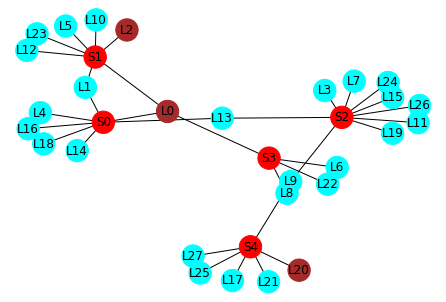

In [12]:
nviz.plot_soma_limb_concept_network(neuron_obj)

In [13]:
nviz.visualize_neuron(neuron_obj,
                     limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Visualizing the Zero Soma Errors

In [15]:
minnie.AutoProofreadNeurons() & "nucleus_id=0"

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version the version of code used for this cell typing classification,multiplicity the total number of neurons that came from the parent segment id,cell_type_predicted morphology predicted by classifier,spine_category,n_axons Number of axon candidates identified,n_apicals Number of apicals identified,nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,nuclei_distance the distance to the closest nuclei (even if no matching nuclei found),n_nuclei_in_radius the number of nuclei within the search radius of 15000 belonging to that segment,n_nuclei_in_bbox the number of nuclei within the bounding box of that soma,"soma_x x coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_y y coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_z z coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)",max_soma_n_faces The largest number of faces of the somas,max_soma_volume The largest volume of the somas the (volume in billions (10*9 nm^3)),mesh_faces faces indices that were saved off as belonging to proofread neuron (external storage),n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,axon_angle_maximum the anlge of an identified axon,spine_density_classifier the number of spines divided by skeletal length for branches analyzed in classification,n_branches_processed the number branches used for the spine density analysis,skeletal_length_processed The total skeletal length of the viable branches used for the spine density analysis,n_branches_in_search_radius the number branches existing in the search radius used for spine density,skeletal_length_in_search_radius The total skeletal length of the branches existing in the search radius used for spine density,run_time the amount of time to run (seconds)
864691134655557709,0,0.25,30.00,0,0,0,0,1,inhibitory,no_spined,1,1,0,22562.71,0,0,154545,162818,20571,26597,494,=BLOB=,54501,111114,0,0,0,0,1,3,9,7,65349.0173

In [20]:
segment_id = 864691134884765690

In [21]:
minnie.NeuronGliaNuclei() & dict(segment_id=segment_id)

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,n_glia_faces The number of faces that were saved off as belonging to glia,glia_faces faces indices that were saved off as belonging to glia (external storage),n_nuclei_faces The number of faces that were saved off as belonging to nuclie,nuclei_faces faces indices that were saved off as belonging to nuclei (external storage)
864691134884765690,0,0.25,30.00,0,=BLOB=,110574,=BLOB=


In [22]:
minnie.DecompositionSplit() & dict(segment_id=segment_id)

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,split_version the version of the splitting algorithm used,multiplicity the number of somas found for this base segment,n_splits the number of cuts required to help split the neuron,split_success the successfulness of the splitting,n_error_limbs_cancelled number of limbs that couldn't be resolved and cancelled out,n_same_soma_limbs_cancelled number of same soma touching limbs that couldn't be resolved and cancelled out,n_multi_soma_limbs_cancelled number of multi soma touching limbs that couldn't be resolved and cancelled out,error_imbs_cancelled_area the total area (in microns^2) of the limbs that was cancelled out because touching the same soma multiple times or multiple somas,error_imbs_cancelled_skeletal_length the total skeletal length (in microns) of the limbs that were called out because could not be resolved,split_results will store the results of how to split the limbs of neuron objects from original neuron,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,max_soma_n_faces The largest number of faces of the somas,max_soma_volume The largest volume of the somas the (volume in billions (10*9 nm^3)),n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)


In [23]:
neuron_obj = (minnie.Decomposition() & dict(segment_id=segment_id)).fetch1("decomposition")

Decompressing Neuron in minimal output mode...please wait
